## Problem 1

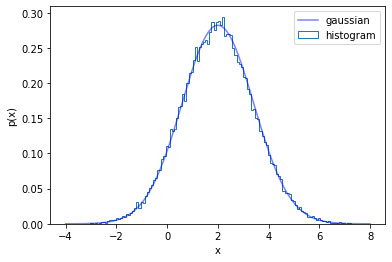

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import random

x = 0
results = []

for i in range(100000):
    p = norm(2, np.sqrt(2)).pdf(x)
    
    x_ = np.random.normal(x, 1)
    q = norm(2, np.sqrt(2)).pdf(x_)
    
    r = random.uniform(0, 1)
   
    if (q/p > r):
        x = x_
    else:
        x = x
      
    results.append(x)
    
t = np.linspace(-4, 8, 1000)
plt.hist(results, bins = 'fd', histtype = 'step', alpha = 2, label = 'histogram', density = True)
plt.plot(t, norm.pdf(t, 2, np.sqrt(2)), 'b', alpha = 0.5, label = 'gaussian')
plt.legend()
plt.xlabel('x')
plt.ylabel('p(x)')
plt.show()

## Problem 2

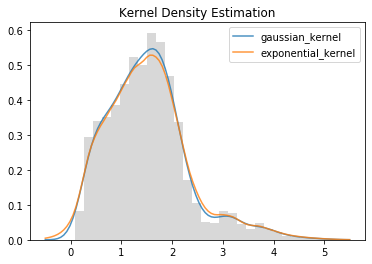

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors.kde import KernelDensity

df = pd.read_csv('data.csv')
data = np.array(df['z'], dtype = float)
data = data.reshape(-1, 1)

x = np.linspace(-0.5, 5.5, 100).reshape(-1,1)

kde_normal =  KernelDensity(bandwidth = 0.2, kernel = 'gaussian')
kde_normal = kde_normal.fit(data).score_samples(x)

kde_expo =  KernelDensity(bandwidth = 0.2, kernel = 'exponential')
kde_expo = kde_expo.fit(data).score_samples(x)

pdf_normal = np.exp(kde_normal)
pdf_expo = np.exp(kde_expo)

plt.plot(x, pdf_normal, alpha = 0.8, label = 'gaussian_kernel')
plt.plot(x, pdf_expo, alpha = 0.8, label = 'exponential_kernel')
plt.hist(data, 30, fc = 'gray', histtype = 'stepfilled', alpha = 0.3, density = True)
plt.title('Kernel Density Estimation')
plt.legend(loc = 'best', fontsize = 10)
plt.show()